#### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 1. Analysis

In [2]:
measures = pd.read_csv('../data/cleaned.csv')

In [3]:
measures.sample(5)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC
61,2.1,12.2,23,21.5,9,SP98,1
98,22.9,5.3,45,20.5,7,SP98,0
106,22.4,4.9,66,20.5,7,SP98,0
125,16.1,4.5,33,21.5,6,SP98,0
286,16.3,4.5,58,22.0,16,SP98,0


In [4]:
measures['gas_type'].value_counts()

gas_type
SP98    219
E10     157
Name: count, dtype: int64

### 2. Visualizations

There are many ways to explain the data, but we have been asked which fuel is best given the different characteristics we have in the data set. In the following, the story will take this path.

The first question we might have is if any of the fuels represented in the data is being penalized fue to factors like speed, if AC is on or off or maybe temperatures.

The first answer human might give is that YES, the speed does infer in the fuel consumption. Let's see it in an scatter plot.

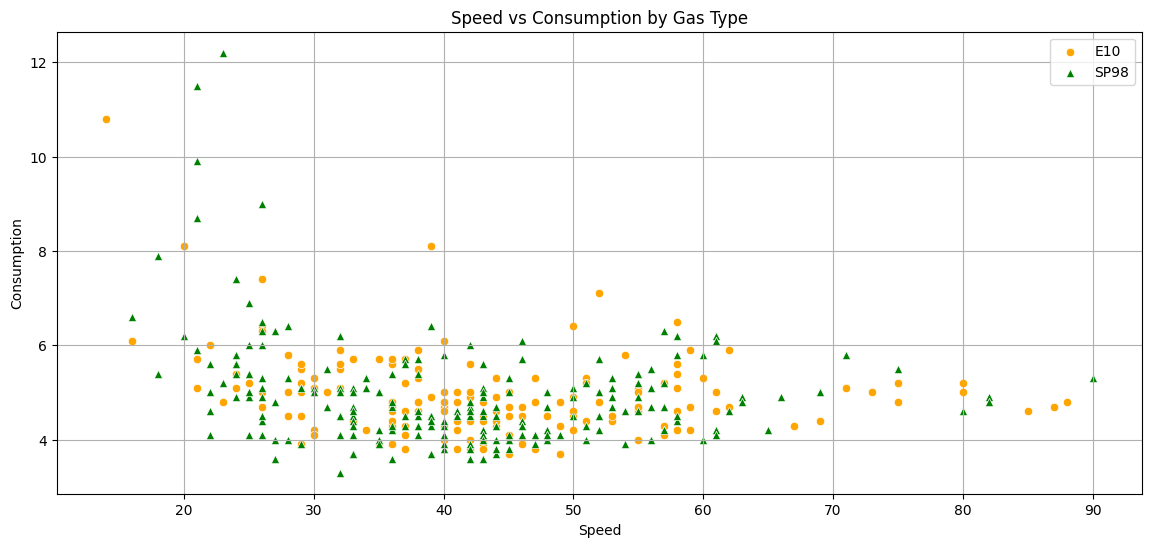

In [5]:
measures.groupby('gas_type')['consume'].agg(['mean', 'max', 'min'])
gas_type_A = measures[measures['gas_type'] == 'E10']
gas_type_B = measures[measures['gas_type'] == 'SP98'] 

plt.figure(figsize=(14, 6))

sns.scatterplot(x=gas_type_A['speed'], y=gas_type_A['consume'], color='orange', label='E10', marker='o')
sns.scatterplot(x=gas_type_B['speed'], y=gas_type_B['consume'], color='green', label='SP98', marker='^')

plt.title('Speed vs Consumption by Gas Type')
plt.xlabel('Speed')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.savefig('../figures/01_consume_speed.png')
plt.show()

We will divide the dispersions by fuel type into two separate scatterplots.

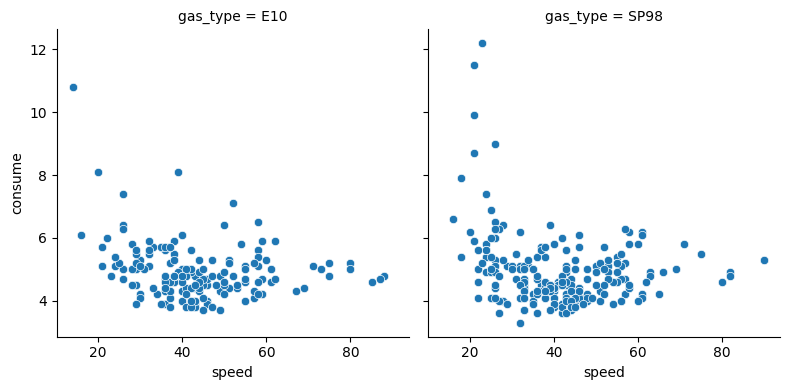

In [6]:
consume_speeds_fuel_scat_split = sns.FacetGrid(measures, col="gas_type", height=4).map(sns.scatterplot, "speed", "consume")
consume_speeds_fuel_scat_split.map(sns.scatterplot, "speed", "consume")
consume_speeds_fuel_scat_split.figure.savefig('../figures/02_consume_speed_fuel.png')

Let's see the distribution per fuel type.

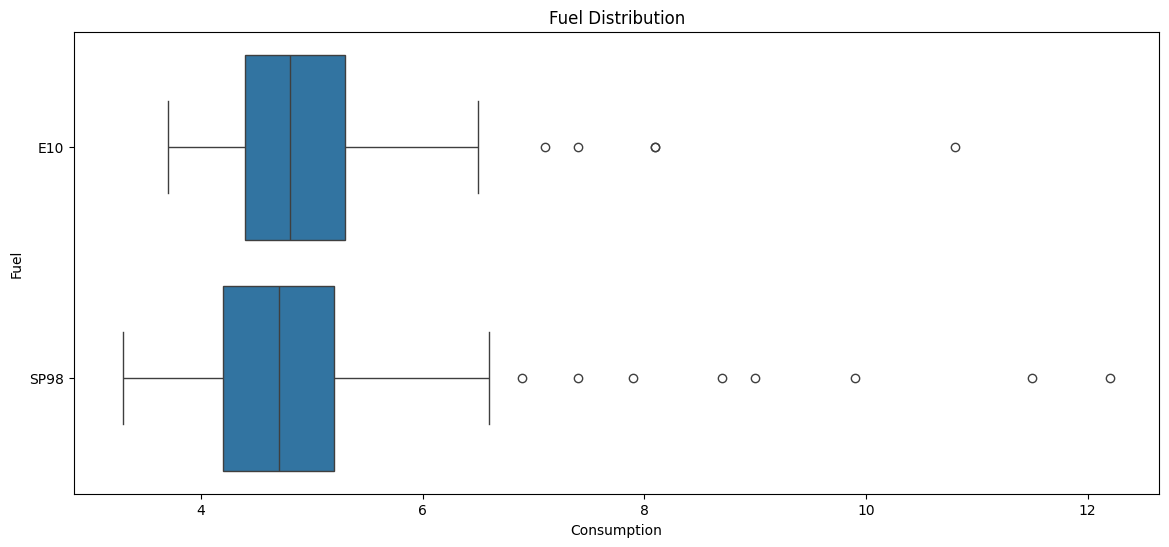

In [7]:
plt.figure(figsize=(14, 6))
boxplot_fuels_consumption = sns.boxplot(x="consume", y="gas_type", data=measures)

plt.title('Fuel Distribution')
plt.xlabel('Consumption')
plt.ylabel('Fuel')
boxplot_fuels_consumption.figure.savefig('../figures/03_boxplot_fuels_consume.png')

From the boxplots above, SP98 fuel seems to be performing better than E10 according to the median and Q1.

Now, regarding the principal question, could we see how the AC infers in consumption?

In [8]:
measures['AC'].value_counts()

AC
0    346
1     30
Name: count, dtype: int64

In [9]:
measures_ac_on = measures[measures['AC'] == 1]
measures_ac_on.groupby('gas_type')['consume'].count()

gas_type
E10      7
SP98    23
Name: consume, dtype: int64

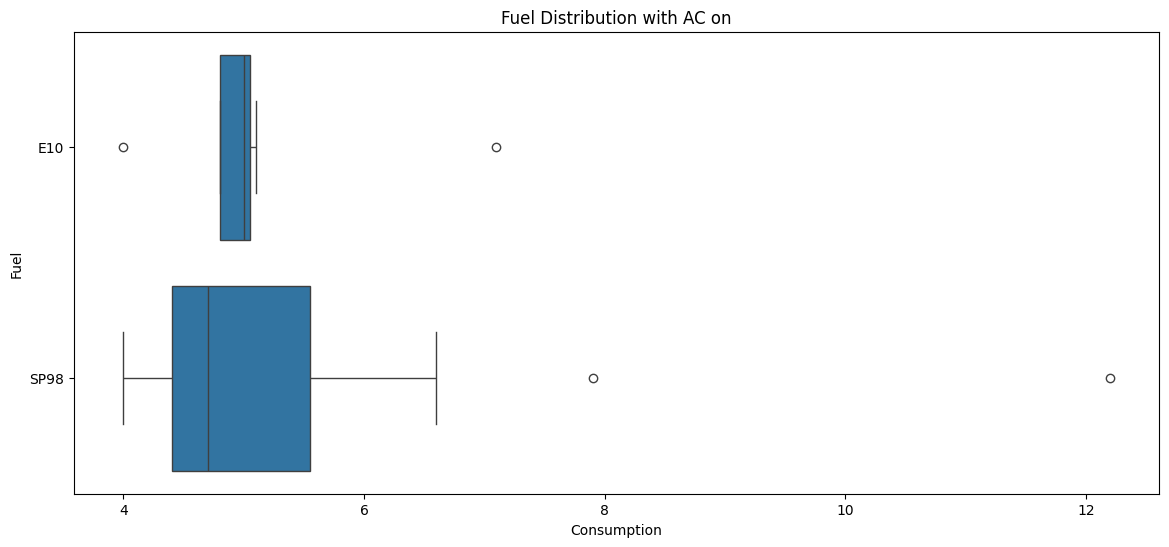

In [10]:
plt.figure(figsize=(14, 6))
fuel_consume_ac_on = sns.boxplot(x='consume', y='gas_type', data=measures_ac_on)

plt.title('Fuel Distribution with AC on')
plt.xlabel('Consumption')
plt.ylabel('Fuel')
fuel_consume_ac_on.figure.savefig('../figures/04_boxplot_fuels_consume_ac_on.png')

Even there's a little observation on AC on, the SP98 seems to perform better than E10.

In [11]:
measures_ac_off = measures[measures['AC'] == 0]
measures_ac_off.groupby('gas_type')['consume'].count()

gas_type
E10     150
SP98    196
Name: consume, dtype: int64

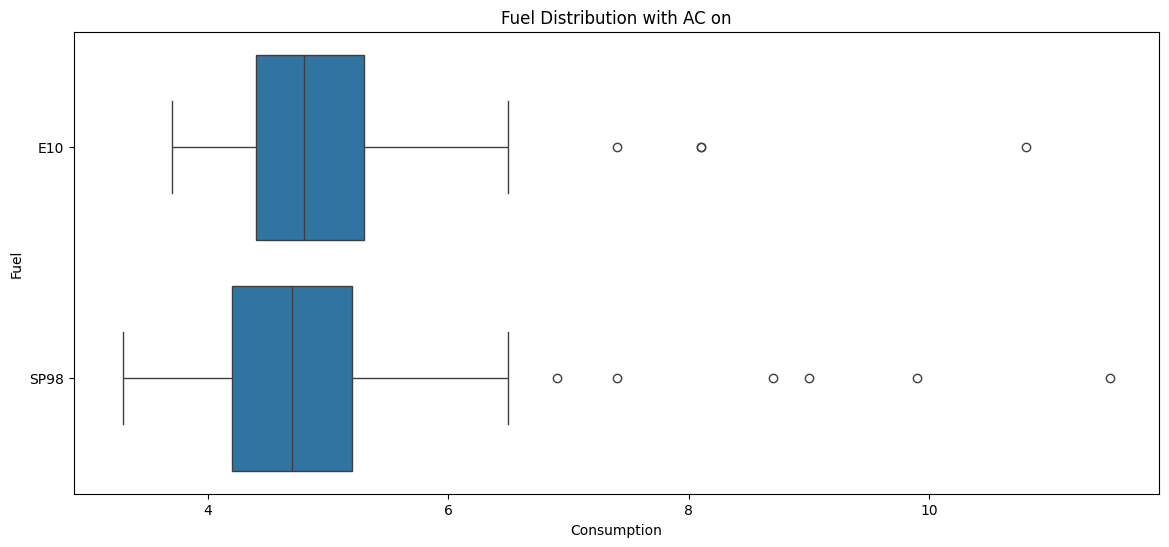

In [12]:
plt.figure(figsize=(14, 6))
fuel_consume_ac_off = sns.boxplot(x='consume', y='gas_type', data=measures_ac_off)

plt.title('Fuel Distribution with AC off')
plt.xlabel('Consumption')
plt.ylabel('Fuel')
fuel_consume_ac_off.figure.savefig('../figures/05_boxplot_fuels_consume_ac_off.png')

With the AC off, the SP98 still to perform better according to de median and Q1.